In [49]:
import cv2
import numpy as np
from skimage import exposure
from scipy.ndimage import interpolation as inter
import matplotlib.pyplot as plt

In [50]:
'''
def illumination_adjustment(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Histogram Equalization
    hist_eq = cv2.equalizeHist(gray)
    # Adaptive Gamma Correction
    gamma_corrected = exposure.adjust_gamma(hist_eq, gamma=1.0)
    return gamma_corrected
'''

'\ndef illumination_adjustment(image):\n    # Convert to grayscale\n    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)\n    # Histogram Equalization\n    hist_eq = cv2.equalizeHist(gray)\n    # Adaptive Gamma Correction\n    gamma_corrected = exposure.adjust_gamma(hist_eq, gamma=1.0)\n    return gamma_corrected\n'

In [51]:
def orientation_correction(image):
    # Convert to grayscale if not already
    if len(image.shape) == 3 and image.shape[2] == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image
    
    # Edge detection
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    # Hough Line Transform
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)
    
    if lines is not None:
        # If lines are detected, calculate rotation angle
        angles = []
        for rho, theta in lines[:, 0]:
            angle = np.degrees(theta) - 90
            if angle > 45:
                angle -= 90
            elif angle < -45:
                angle += 90
            angles.append(angle)
        
        # Average angle
        if angles:
            angle = np.mean(angles)
            # Rotate image
            if len(image.shape) == 2:  # Single channel
                image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
            return inter.rotate(image, angle, reshape=False, mode='nearest')
    
    return image

In [52]:
def resolution_optimization(image, target_dpi=300):
    height, width = image.shape[:2]
    scale = target_dpi / 96  # Assuming original DPI is 96
    new_size = (int(width * scale), int(height * scale))
    resized_image = cv2.resize(image, new_size, interpolation=cv2.INTER_CUBIC)
    return resized_image

In [53]:
def grayscale_conversion(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [54]:
def binarization(image):
    # Convert to grayscale if not already
    if len(image.shape) == 3 and image.shape[2] == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image
    
    _, binary_image = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary_image

In [55]:
def noise_reduction(image):
    return cv2.medianBlur(image, 3)

In [56]:
def unsharp_masking(image):
    blurred = cv2.GaussianBlur(image, (9, 9), 10.0)
    sharpened = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)
    return sharpened

In [57]:
def normalization(image):
    normalized_image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
    return normalized_image


In [58]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image at path {image_path} could not be loaded.")
    
    # Step 1: Illumination Adjustment
    #image = illumination_adjustment(image)
    
    # Convert to 3-channel image if needed
    if len(image.shape) == 2:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    
    # Step 2: Orientation Correction
    image = orientation_correction(image)
    
    # Convert to 3-channel image if needed
    if len(image.shape) == 2:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    
    # Step 3: Resolution Optimization
    image = resolution_optimization(image)
    
    # Step 4: Grayscale Conversion
    image = grayscale_conversion(image)
    
    # Step 5: Binarization
    image = binarization(image)
    
    # Step 6: Noise Reduction
    image = noise_reduction(image)
    
    # Step 7: Unsharp Masking
    image = unsharp_masking(image)
    
    # Step 8: Normalization
    image = normalization(image)
    
    return image

/var/folders/dm/57p79rn96kz8hvqc6j8df43r0000gn/T/ipykernel_20336/3799670999.py:30: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  return inter.rotate(image, angle, reshape=False, mode='nearest')


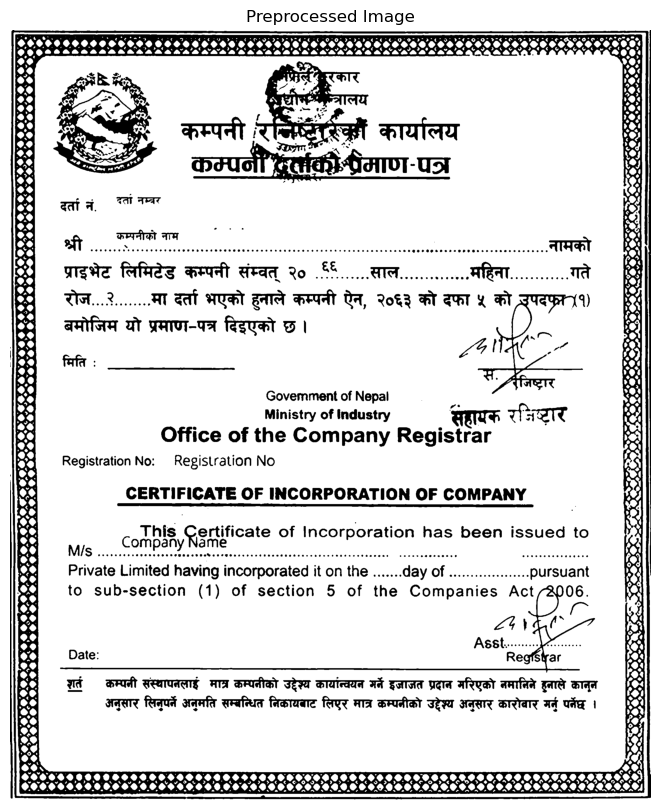

In [59]:
def display_image(image, title="Image"):
    # Convert image from BGR to RGB
    if len(image.shape) == 3 and image.shape[2] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap='gray' if len(image.shape) == 2 else None)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Example usage
image_path = 'data/company.jpg'
preprocessed_image = preprocess_image(image_path)
display_image(preprocessed_image, title="Preprocessed Image")